In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
vancouver = pd.read_csv("crime.csv")

In [3]:
vancouver.drop(['MINUTE'], axis=1, inplace=True)
vancouver['NEIGHBOURHOOD'].fillna('N/A', inplace=True)

In [4]:
vancouver['DATE'] = pd.to_datetime({'year':vancouver['YEAR'], 'month':vancouver['MONTH'], 'day':vancouver['DAY']})
vancouver['Day of Week'] = vancouver['DATE'].dt.dayofweek

In [5]:
vancouver.index = pd.DatetimeIndex(vancouver['DATE'])

In [6]:
vancouver = vancouver[vancouver['DATE'] < '2017-01-01']
vancouver.drop(['DATE'], axis=1, inplace=True)

In [7]:
vancouver.head()

,TYPE,YEAR,MONTH,DAY,HOUR,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude,Day of Week
DATE,,,,,,,,,,,,
2003-05-12,Other Theft,2003,5,12,16.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,0
2003-05-07,Other Theft,2003,5,7,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,2
2003-04-23,Other Theft,2003,4,23,16.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,2
2003-04-20,Other Theft,2003,4,20,11.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,6
2003-04-12,Other Theft,2003,4,12,17.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763,5


In [8]:
vancouver['TYPE'].value_counts()

Theft from Vehicle                                        166738
Mischief                                                   67832
Break and Enter Residential/Other                          59558
Offence Against a Person                                   52537
Other Theft                                                49301
Theft of Vehicle                                           37663
Break and Enter Commercial                                 32734
Theft of Bicycle                                           24744
Vehicle Collision or Pedestrian Struck (with Injury)       21230
Vehicle Collision or Pedestrian Struck (with Fatality)       249
Homicide                                                     209
Name: TYPE, dtype: int64

In [9]:
crimes_year = vancouver.groupby(['YEAR']).count()['TYPE']

Text(0.5, 0, 'Year')

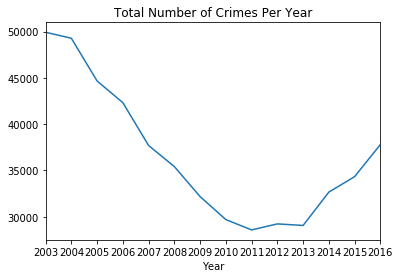

In [105]:
crimes_year.plot()
plt.title("Total Number of Crimes Per Year")
plt.xticks(np.arange(2003,2017, step=1))
plt.xlabel("Year")

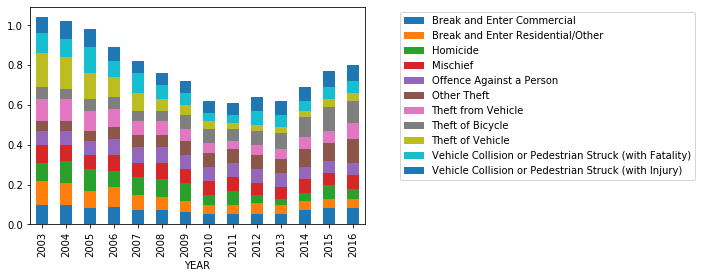

In [11]:
crime_type_by_year = vancouver.groupby(["TYPE", "YEAR"]).count()['MONTH']
crime_type_by_year_df = crime_type_by_year.unstack("TYPE")
w = vancouver.groupby(['TYPE']).count()
div_vec = w['YEAR'] 
crime_type_prop = crime_type_by_year_df.div(div_vec).round(2)
crime_type_prop.stack()

crime_type_prop.plot(kind='bar', stacked=True).legend(loc='upper right', bbox_to_anchor=(2,1))


#crime_type_by_year_df = crime_type_by_year.unstack()
#w = vancouver.groupby(['YEAR']).count()
#div_vec = w['TYPE'] 
#crime_type_prop = crime_type_by_year_df.div(div_vec).round(2)
#crime_type_prop.plot(kind='bar', stacked=True)
#vancouver['TYPE'].value_counts()






#can't quite get the code right, want it to be like the last midterm question, but it is a cool way to represent the line graph
#shown above

In [46]:
mischief = vancouver[vancouver['TYPE'] == 'Mischief']
mischief_days = mischief.groupby(["YEAR", "MONTH", "DAY"]).count()['TYPE']

days = vancouver.groupby(["DATE"]).count()['TYPE']
types = vancouver.groupby(["TYPE", "DATE"]).count()

break_enter_comm = vancouver[vancouver['TYPE'] == 'Break and Enter Commercial']
break_comm_days = break_enter_comm.groupby(['YEAR', 'MONTH', 'DAY']).count()['TYPE']

break_enter_res = vancouver[vancouver['TYPE'] == 'Break and Enter Residential/Other']
break_res_days = break_enter_res.groupby(['YEAR', 'MONTH', 'DAY']).count()['TYPE']

homicide = vancouver[vancouver['TYPE'] == 'Homicide']
homicide_days = homicide.groupby(['YEAR', 'MONTH', 'DAY']).count()['TYPE']

person_off = vancouver[vancouver['TYPE'] == 'Offence Against a Person']
person_off_days = person_off.groupby(['YEAR', 'MONTH', 'DAY']).count()['TYPE']

other_theft = vancouver[vancouver['TYPE'] == 'Other Theft']
other_theft_days = other_theft.groupby(['YEAR', 'MONTH', 'DAY']).count()['TYPE']

theft_ve = vancouver[vancouver['TYPE'] == 'Theft from Vehicle']
theft_ve_days = theft_ve.groupby(['YEAR', 'MONTH', 'DAY']).count()['TYPE']

theft_bi = vancouver[vancouver['TYPE'] == 'Theft of Bicycle']
theft_bi_days = theft_bi.groupby(['YEAR', 'MONTH', 'DAY']).count()['TYPE']

theft_car = vancouver[vancouver['TYPE'] == 'Theft of Vehicle']
theft_car_days = theft_car.groupby(['YEAR', 'MONTH', 'DAY']).count()['TYPE']

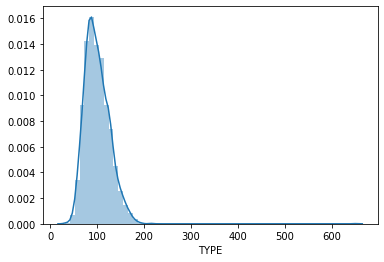

In [25]:
import seaborn as sns
sns.distplot(days, bins=60);

MASSIVE OUTLIER, 600+ CRIMES IN A SINGLE DAY, LET'S SEE WHAT DAY IT WAS

In [68]:
heavy_crime_days = days[days >= 300]
print(heavy_crime_days)

DATE
2011-06-15    649
Name: TYPE, dtype: int64


June 15th, 2011 was the day of the famous Stanley Cup riots, where angry Canucks fans rioted in the streets after allegedly 
throwing the Stanley Cup finals. These riots created outliers in people arrested for Mischief, as well as Breaking and Entering 
into Commercial Areas, causing an overall massive outlier in the city's crimes per day total (more than 400 more crimes than the next-closest day).

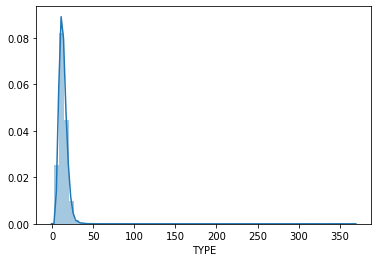

In [30]:
sns.distplot(mischief_days, bins=60);

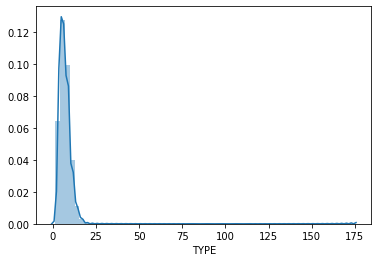

In [29]:
sns.distplot(break_comm_days, bins=60);

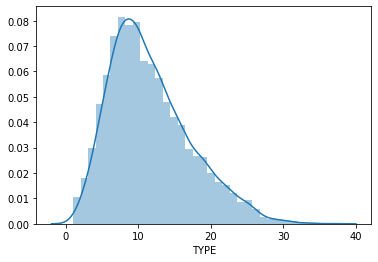

In [64]:
sns.distplot(break_res_days, bins=35);

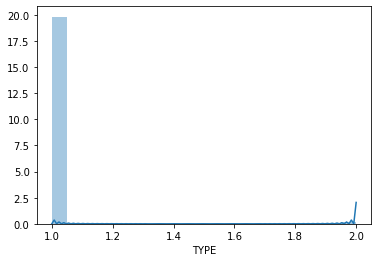

In [69]:
sns.distplot(homicide_days, bins=20);  #wtf?

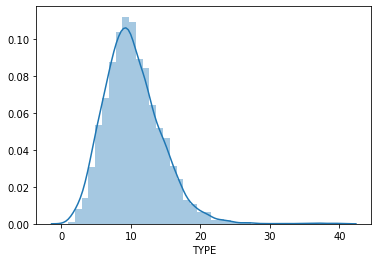

In [70]:
sns.distplot(person_off_days, bins=40);

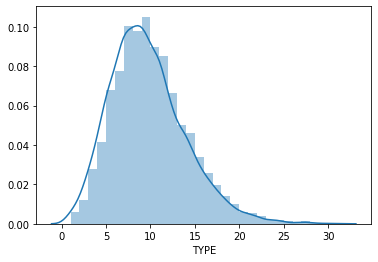

In [71]:
sns.distplot(other_theft_days, bins=30);

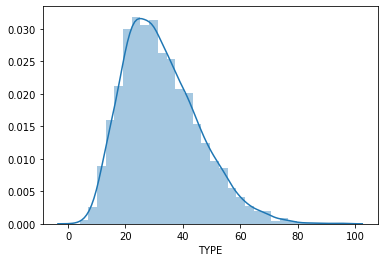

In [72]:
sns.distplot(theft_ve_days, bins=30);

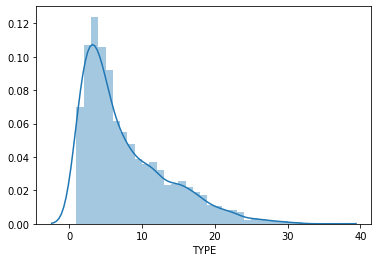

In [73]:
sns.distplot(theft_car_days, bins=35);

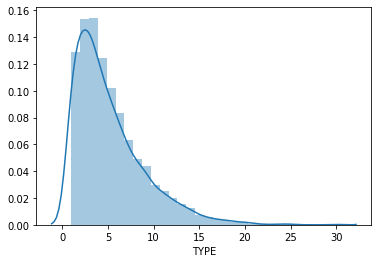

In [74]:
sns.distplot(theft_bi_days, bins=30);

Most Crime per day totals seem to be Normally distributed, except for the Homicide chart (wtf), and the Car and Bike theft
charts, which have more at 0 then kinda flare outward (forget the name of the dist)

Individual Outlier Analysis: Unfinished but will be soon, starting with Mischief and B&E Commercial Crimes (to talk about riots)

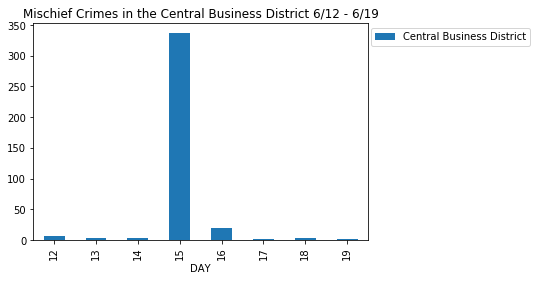

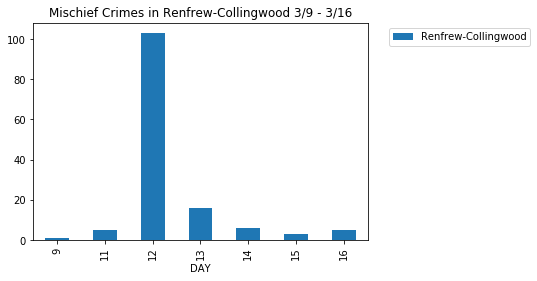

In [90]:
cbd = vancouver[vancouver['YEAR'] == 2011]
cbd1 = cbd[cbd['NEIGHBOURHOOD'] == 'Central Business District']
cbd2 = cbd1[cbd1['MONTH'] == 6]
cbd3 = cbd2[cbd2['DAY'].isin([12,13,14,15,16,17,18,19])]
cbd4 = cbd3[cbd3['TYPE'] == 'Mischief']
mischief_cbd_in_range = cbd4.groupby(['DAY', 'NEIGHBOURHOOD']).count()['TYPE']
mischief_cbd_in_range.unstack().plot(kind='bar')
plt.legend(loc='upper right', bbox_to_anchor=(1.5,1))
plt.title("Mischief Crimes in the Central Business District 6/12 - 6/19");

rc = vancouver[vancouver['YEAR'] == 2008]
rc1 = rc[rc['NEIGHBOURHOOD'] == 'Renfrew-Collingwood']
rc2 = rc1[rc1['MONTH'] == 3]
rc3 = rc2[rc2['DAY'].isin([9,10,11,12,13,14,15,16])]
rc4 = rc3[rc3['TYPE'] == 'Mischief']
mischief_rc_in_range = rc4.groupby(['DAY', 'NEIGHBOURHOOD']).count()['TYPE']
mischief_rc_in_range.unstack().plot(kind='bar')
plt.legend(loc='upper right', bbox_to_anchor=(1.5,1))
plt.title("Mischief Crimes in Renfrew-Collingwood 3/9 - 3/16");

While the spike in Mischief crimes in the Central Business District can be easily explained by the Stanley Cup Riots, I 
couldn't find a single mention of the 100+ mischief arrests in Renfrew-Collingwood on March 12th, 2008. Since there was an elevated number of Mischief crimes the following day, I don't believe that the 100+ outlier was a reporting error by the Vancouver Police.

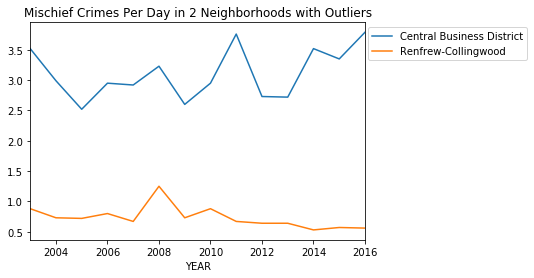

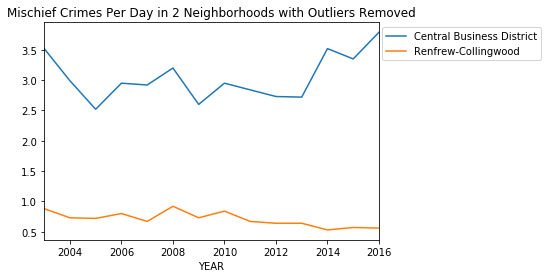

In [246]:
mischief = vancouver[vancouver['TYPE'] == 'Mischief']
mischief_days_by_hood = mischief.groupby(['NEIGHBOURHOOD', 'YEAR']).count()
mischief_per_day = mischief_days_by_hood.unstack('NEIGHBOURHOOD')['TYPE'].div(365.25).round(2)
mischief_per_day[['Central Business District', 'Renfrew-Collingwood']].plot()
plt.legend(loc='upper right', bbox_to_anchor=(1.5,1))
plt.title("Mischief Crimes Per Day in 2 Neighborhoods with Outliers")
plt.legend(loc='upper right', bbox_to_anchor=(1.5,1));

from scipy import stats

mischief_a_day = mischief.groupby(['NEIGHBOURHOOD', 'DAY', 'MONTH', 'YEAR'])['TYPE']
mischief_a_day_df = mischief_a_day.count().unstack('NEIGHBOURHOOD').fillna(0)
mischief_no_outliers =  mischief_a_day_df[(np.abs(stats.zscore(mischief_a_day_df['Central Business District'])) < 5)]
mischief_no_outliers =  mischief_no_outliers[(np.abs(stats.zscore(mischief_no_outliers['Renfrew-Collingwood'])) < 5)]
mischief_no_outliers = mischief_no_outliers.stack().unstack(["YEAR"]).unstack('NEIGHBOURHOOD').sum()

mischief_no_outliers.unstack("NEIGHBOURHOOD")[['Central Business District', 'Renfrew-Collingwood']].div(365.25).round(2).plot()
plt.title("Mischief Crimes Per Day in 2 Neighborhoods with Outliers Removed")
plt.legend(loc='upper right', bbox_to_anchor=(1.5,1));

With the outliers taken out, the graphs more closely resemble the trends given by the Crimes Per Year graph.



Breaking and Entering into Commerical Buildings was also heavily affected by the Stanley Cup Riots, as many rioting fans
broke into and destroyed businesses downtown. Were there any more significant days where people broke into commercial buildings?

Breaking and Entering Commercial is distributed normally enough to search for outliers using standard deviation, so I'll do that.

In [290]:
break_comm_days[(np.abs(stats.zscore(break_comm_days)) > 4)]

YEAR  MONTH  DAY
2004  9      16      24
2006  2      3       24
2011  6      15     174
Name: TYPE, dtype: int64

While there were two days with 24 Breaking and Entering (Commercial) crimes, neither are particularly close to the 174 people
arrested for breaking and entering during the 2011 Stanley Cup Riots.

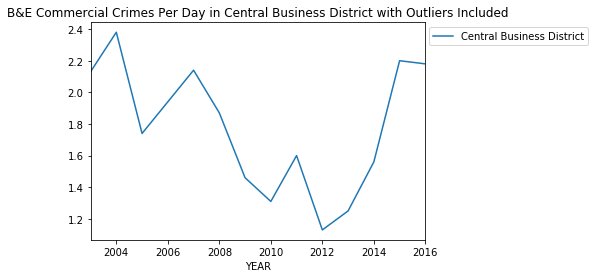

In [287]:
bec = break_enter_comm.groupby(['NEIGHBOURHOOD', 'YEAR', 'MONTH', 'DAY'])['TYPE']
break_comm_df = bec.count().unstack('NEIGHBOURHOOD').fillna(0)
bec_cbd_sum = break_comm_df.stack().unstack("YEAR").unstack("NEIGHBOURHOOD").sum()


bec_cbd_sum.unstack("NEIGHBOURHOOD")['Central Business District'].div(365.25).round(2).plot()
plt.title("B&E Commercial Crimes Per Day in Central Business District with Outliers Included")
plt.legend(loc='upper right', bbox_to_anchor=(1.5,1));


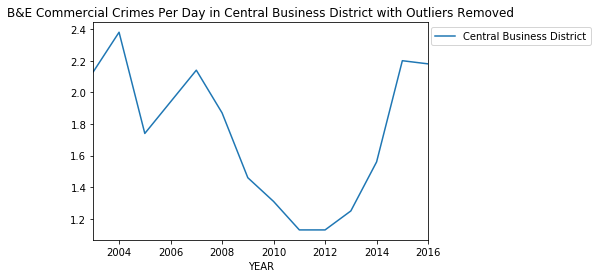

In [288]:
bec_cbd_no_outliers =  break_comm_df[(np.abs(stats.zscore(break_comm_df['Central Business District'])) < 5)]
bec_cbd_no_outliers_sum = bec_cbd_no_outliers.stack().unstack("YEAR").unstack("NEIGHBOURHOOD").sum()

bec_cbd_no_outliers_sum.unstack("NEIGHBOURHOOD")['Central Business District'].div(365.25).round(2).plot()
plt.title("B&E Commercial Crimes Per Day in Central Business District with Outliers Removed")
plt.legend(loc='upper right', bbox_to_anchor=(1.5,1));

The exclusion of the Stanley Cup Riots allows us to see that the city's initiative to cut down break-ins from 2007-2012 really 
worked!